In [8]:
import torch
from gym2 import *
from strategycoding import decode_output
from packet import packet_summary
import matplotlib.pyplot as plt


1000
2000
3000
4000
5000
6000
7000
8000
9000


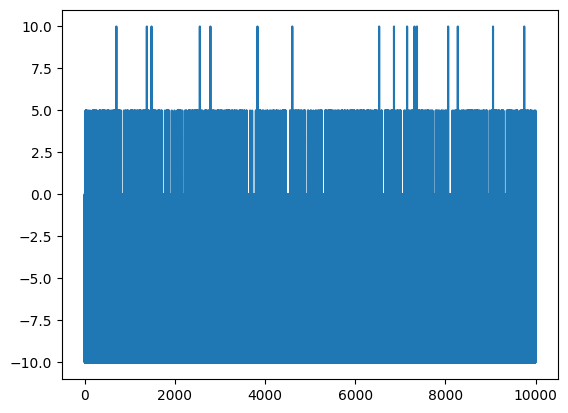

10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


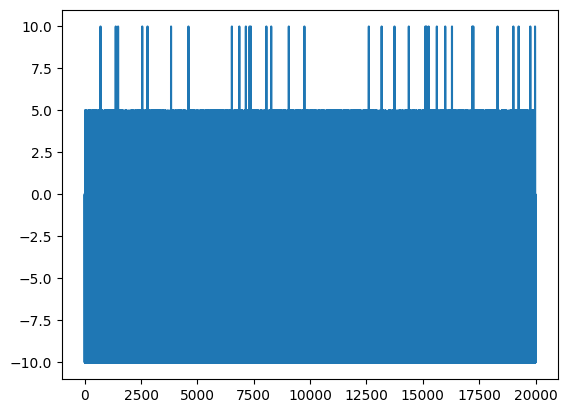

20000
21000
22000
23000
24000
25000
26000
27000


In [18]:
count = 0
reward = 0
rewards = []
evaluator = Evaluator(censor_index=0)
base_packet, packets, response_packets = reset_environment(evaluator)

while(reward < 50):
    noisy_outputs = torch.tensor(np.random.uniform(-1000, 1000, size=NUM_PACKETS*PACKET_SIZE)).float()
    noisy_outputs[[0,1,2,3]] = -10
    modified_packets = decode_output(base_packet, packets, noisy_outputs)
    reward, response_packets = evaluator.evaluate(modified_packets)
    rewards.append(reward)
    count += 1
    if count % 1000 == 0:
        print(count)
    if count % 10000 == 9999:
        plt.plot(np.arange(0, len(rewards), 1), rewards)
        plt.show()



print('Number of Iterations,',count)
print('base:')
packet_summary(base_packet)
print('modified:')
for packet in modified_packets:
    packet_summary(packet)
print('response')
for packet in response_packets:
    packet_summary(packet)



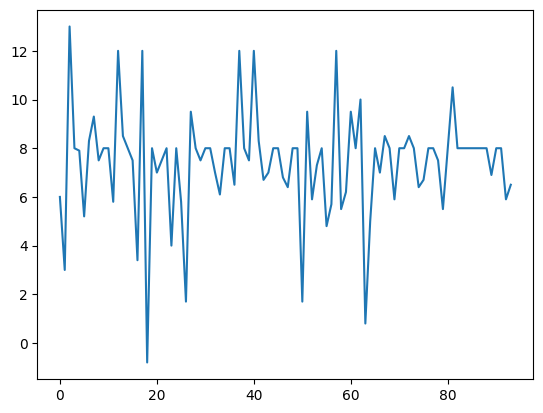

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('rewards2.csv')
data = df.to_numpy()
y = np.array([[i, group.max()] for i, group in enumerate(data[::100,1])])

plt.plot(y[:,0], y[:,1])


plt.show()